In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import joblib
import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")


In [25]:
# Load dataset
diabetes_dataset = pd.read_csv("diabetes.csv")
diabetes_dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# -------------------------------
#  Fix zero values (VERY IMPORTANT)
# -------------------------------
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in cols:
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, np.nan)
    diabetes_dataset[col].fillna(diabetes_dataset[col].median(), inplace=True)

In [5]:
# Split features and target
X = diabetes_dataset.drop(columns="Outcome", axis=1)
Y = diabetes_dataset["Outcome"]

In [6]:
# -------------------------------
#  Stratified Split (IMPORTANT)
# -------------------------------
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

In [7]:
# Basic information
print("Shape of dataset:", diabetes_dataset.shape)


Shape of dataset: (768, 9)


In [8]:

print("\nOutcome Value Counts:")
print(diabetes_dataset["Outcome"].value_counts())


Outcome Value Counts:
Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
print("\nGroupby Outcome Mean:")
print(diabetes_dataset.groupby("Outcome").mean())


Groupby Outcome Mean:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164  


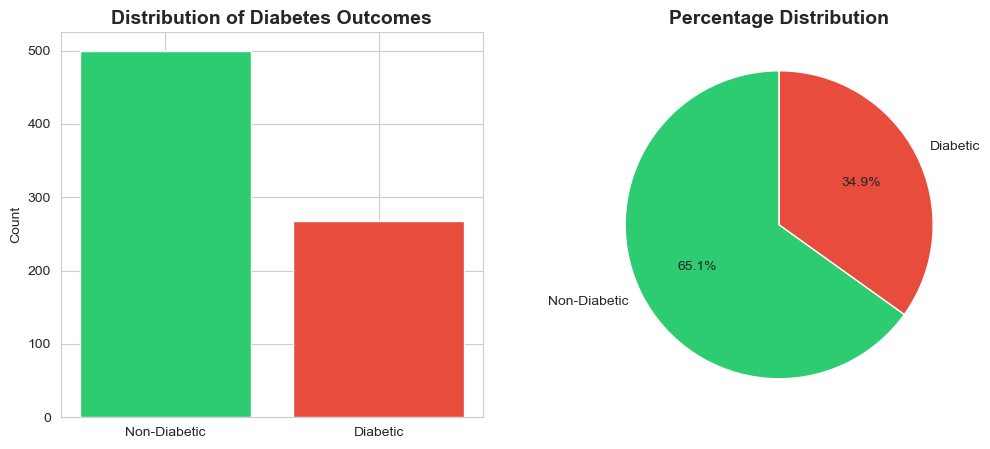

In [10]:
# Plotting the distribution of diabetes outcomes

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 5))

# ------------------------- #
# 1. Bar Chart of Outcomes  #
# ------------------------- #
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot

# Count the number of Non-Diabetic (0) and Diabetic (1)
outcome_counts = diabetes_dataset["Outcome"].value_counts()

# Bar chart
plt.bar(
    ['Non-Diabetic', 'Diabetic'],  # x-axis labels
    outcome_counts.values,          # height of bars
    color=['#2ecc71', '#e74c3c']   # green for non-diabetic, red for diabetic
)

plt.title('Distribution of Diabetes Outcomes', fontsize=14, fontweight='bold')
plt.ylabel('Count')

# ------------------------- #
# 2. Pie Chart of Outcomes  #
# ------------------------- #
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot

plt.pie(
    outcome_counts.values,                 # data
    labels=['Non-Diabetic', 'Diabetic'],  # labels
    autopct="%1.1f%%",                     # show percentage with 1 decimal
    colors=['#2ecc71', '#e74c3c'],        # same colors as bar chart
    startangle=90                          # rotate start angle
)

plt.title('Percentage Distribution', fontsize=14, fontweight='bold')

# Display both plots
plt.show()


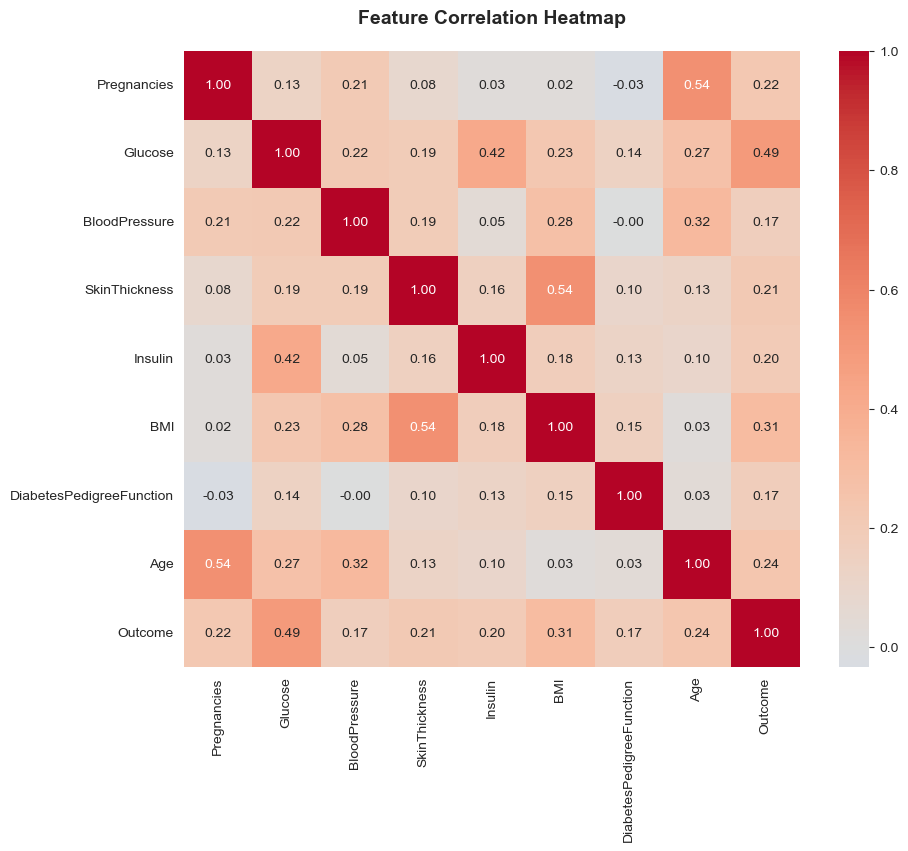

In [11]:
# Plotting correlation heatmap of features

plt.figure(figsize=(10, 8))  # set figure size

# Compute correlation matrix
correlation = diabetes_dataset.corr()

# Create heatmap
sns.heatmap(
    correlation,        # correlation data
    annot=True,         # show numbers in cells
    cmap='coolwarm',    # color map
    center=0,           # center the colormap at 0
    square=True,        # square cells
    fmt='.2f'           # 2 decimal places
)

# Add title
plt.title('Feature Correlation Heatmap', fontsize=14, pad=20, fontweight='bold')

# Show plot
plt.show()


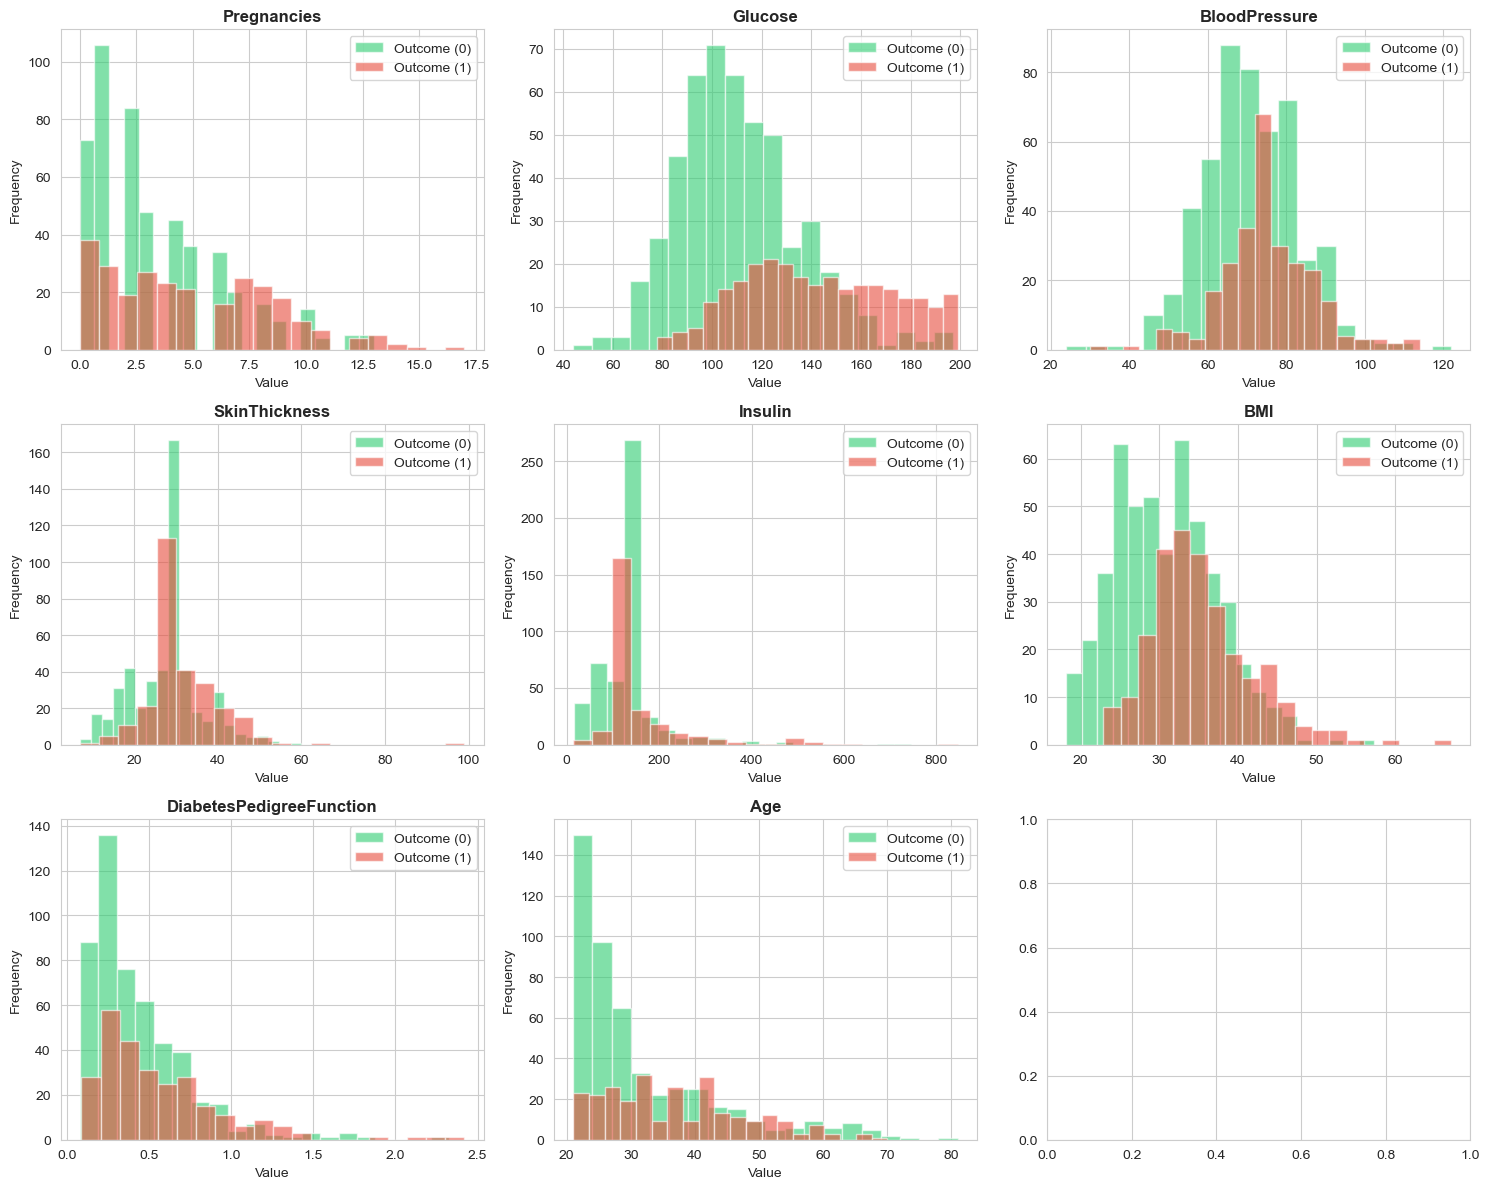

In [12]:
# Plot histograms of all features grouped by Outcome

fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid of plots
features = diabetes_dataset.columns[:-1]          # exclude 'Outcome' column

colors = ['#2ecc71', '#e74c3c']  # green=Non-Diabetic, red=Diabetic

for idx, feature in enumerate(features):
    row, col = idx // 3, idx % 3  # locate subplot

    for outcome in [0, 1]:
        # Select data for current outcome
        data = diabetes_dataset[diabetes_dataset['Outcome'] == outcome][feature]

        # Plot histogram
        axes[row, col].hist(
            data,
            alpha=0.6,
            bins=20,
            label=f"Outcome ({outcome})",
            color=colors[outcome]
        )

    # Set titles and labels
    axes[row, col].set_title(feature, fontweight="bold")
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()  # adjust spacing
plt.show()


In [13]:
# Split the dataset into features (X) and target (Y)

X = diabetes_dataset.drop(columns='Outcome', axis=1)  # Features: all columns except 'Outcome'
Y = diabetes_dataset['Outcome']  
# Display the features and target
print("Features (X):")
print(X.head())   # Show first 5 rows of features

print("\nTarget (Y):")
print(Y.head())   # Show first 5 rows of target

Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target (Y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [14]:
scaler = StandardScaler()       # Create StandardScaler object
X_scaled = scaler.fit_transform(X)  # Fit scaler on X and transform
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [15]:
# Use scaled features for ML
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled,       # Use scaled features
    Y,              # Target
    test_size=0.2,  # 20% data for testing
    stratify=Y,     # Maintain proportion of classes
    random_state=2  # For reproducibility
)

# Print shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape: ", Y_test.shape)


# -------- SVM Classifier --------
classifier = svm.SVC(kernel='linear', probability=True)  # Create SVM model
classifier.fit(X_train, Y_train)                         # Train the model

# Print confirmation
print("\nSVM model trained successfully!")

X_train shape: (614, 8)
X_test shape:  (154, 8)
Y_train shape: (614,)
Y_test shape:  (154,)

SVM model trained successfully!


In [16]:
# Prediction on test data
x_test_prediction = classifier.predict(X_test)

# Accuracy
test_data_accuracy = accuracy_score(Y_test, x_test_prediction)
print("Test Accuracy:", test_data_accuracy)

# Other evaluation metrics
precision = precision_score(Y_test, x_test_prediction)
recall = recall_score(Y_test, x_test_prediction)
f1 = f1_score(Y_test, x_test_prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Test Accuracy: 0.7727272727272727
Precision: 0.7567567567567568
Recall: 0.5185185185185185
F1 Score: 0.6153846153846154


In [17]:
# Create Random Forest model
# n_estimators=100 → number of trees in the forest
# random_state=2 → ensures reproducible results
rf_classifier = RandomForestClassifier(
    n_estimators=500, # more trees
    max_depth=8, # control depth
    min_samples_split=5,# avoid overfitting
    min_samples_leaf=2, # avoid tiny leaves
    class_weight="balanced",# handle imbalance
    random_state=42)

# Train the model on training data
# X_train → input features for training
# y_train → actual labels for training
rf_classifier.fit(X_train, Y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",2
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [18]:
# Predict on test data
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy of Random Forest model
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Other evaluation metrics
rf_precision = precision_score(Y_test, rf_predictions)  # How many predicted diabetic are actually diabetic
rf_recall = recall_score(Y_test, rf_predictions)        # How many actual diabetic are correctly predicted
rf_f1 = f1_score(Y_test, rf_predictions)               # Harmonic mean of precision and recall
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Random Forest Accuracy: 0.7662337662337663
Precision: 0.6730769230769231
Recall: 0.6481481481481481
F1 Score: 0.660377358490566


[[83 17]
 [19 35]]


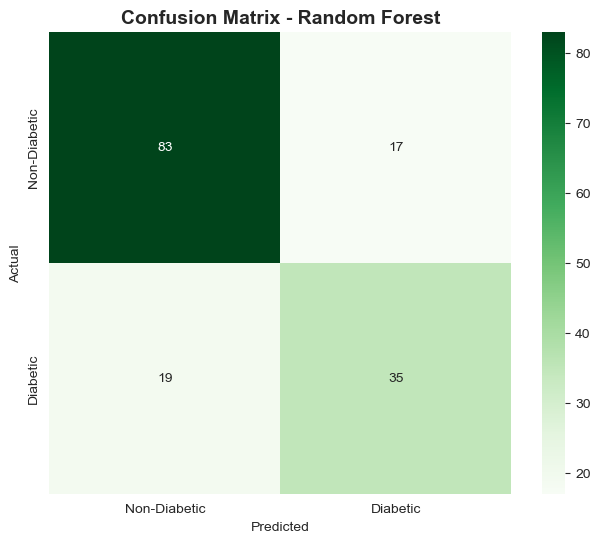

In [19]:
# Confusion Matrix
cm_rf = confusion_matrix(Y_test, rf_predictions)
print(cm_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf,
    annot=True,            # Show numbers in cells
    fmt='d',               # Integer format
    cmap='Greens',         # Color theme
    square=True,           # Square cells
    xticklabels=['Non-Diabetic', 'Diabetic'],
    yticklabels=['Non-Diabetic', 'Diabetic']
)
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [20]:
# -----------------------------
# Compare SVM vs Random Forest
# -----------------------------

# Print SVM test accuracy
print('SVM Test Accuracy:', test_data_accuracy)  # test_data_accuracy from SVM

# Print Random Forest test accuracy
print('Random Forest Test Accuracy:',rf_accuracy )  # test_data_accuracy_rf from Random Forest


SVM Test Accuracy: 0.7727272727272727
Random Forest Test Accuracy: 0.7662337662337663


In [21]:


# Save trained model
joblib.dump(classifier, 'diabetes_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler_svm.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [22]:
# -----------------------------
# Predict Diabetes for New Patient
# -----------------------------

# Input data for a single patient
# Order of features must match training data:
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert tuple to NumPy array
input_num_array = np.asarray(input_data)

# Reshape to 2D array (1 row, 8 features)
reshape = input_num_array.reshape(1, -1)

# Scale the input data (if you used StandardScaler during training)
# scaler should be the same object fitted on training data
std_data = scaler.transform(reshape)

# Make prediction using SVM classifier
prediction = classifier.predict(std_data)

# Print human-readable result
if prediction[0] == 0:
    print("Prediction: Patient is Non-Diabetic")
else:
    print("Prediction: Patient is Diabetic")

Prediction: Patient is Diabetic
